###**Handwritten Digit Recognition using Convolutional Neural Network (CNN) with Tensorflow**

**Importing the dependencies**

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing
import math
import datetime
import platform

In [27]:
# Load the TensorBoard notebook extension
!rm -rf ./.logs/

**Loading the dataset**

In [28]:
(X, y), (X_test, y_test) = mnist.load_data()

**Split the training data into training and validation**

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=43)

In [30]:
type(X_train)

numpy.ndarray

**Data Overview**

In [31]:
# Shape of the numpy arrays
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)
(10000, 28, 28) (10000,)


Training data = 42,000 Images

Validation data = 18000 Images

Test data = 10,000 Images

Image dimension --> 28 * 28

Grayscale Image --> 1 channel

In [32]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  70
  129 188 254 232  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  43  99 104 187 229
  253 253 253 253  98   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  41 107 202 253 254 23

In [33]:
print(X_train[10].shape)

(28, 28)


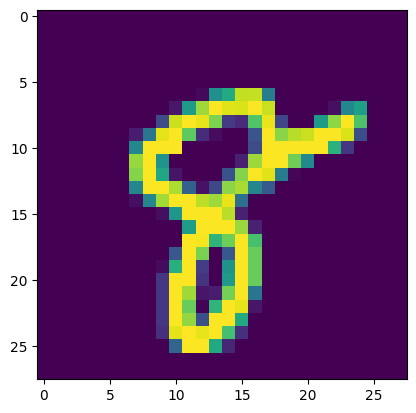

8


In [34]:
# displaying the image

plt.imshow(X_train[0])
plt.show()

# print the corresponding label
print(y_train[0])

Image Labels

In [35]:
print(y_train.shape, y_val.shape, y_test.shape)

(42000,) (18000,) (10000,)


In [37]:
# unique values in y_train
print(np.unique(y_train))

# unique values in y_val
print(np.unique(y_val))

# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**Normalizing the data**

In [38]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [39]:
# printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Reshape the input images

In [40]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

**Building the CNN model to classify Handwritten Digits**

A Convolutional Neural Network (CNN) model typically includes convolutional and pooling layers that extract features from images.

In our case, we’re using a Sequential Keras model. Initially, the 28×28 input image reshaped appropriately to fit the expected input format for the convolutional layers.

We then apply two pairs of Conv2D and MaxPooling2D layers. The convolutional layers help extract local features, while the max pooling layers reduce spatial dimensions by selecting the maximum value from each region, effectively downsampling the data while preserving key information.

After the convolutional stack, we use a Flatten layer to convert the multidimensional feature maps into a 1D vector.

Finally, we add a Dense output layer with 10 softmax units. Each unit corresponds to one digit class (0–9), and the output values represent the network’s predicted probabilities for each digit.

In [41]:
model = keras.models.Sequential()

model.add(keras.layers.Convolution2D(
    input_shape=(28, 28, 1),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=keras.activations.relu,
    kernel_initializer=keras.initializers.VarianceScaling()
))

model.add(keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=keras.activations.relu,
    kernel_initializer=keras.initializers.VarianceScaling()
))

model.add(keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(
    units=128,
    activation=keras.activations.relu
))

model.add(tf.keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(
    units=10,
    activation=keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)








Summary of the training model

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)





Visualization of the model

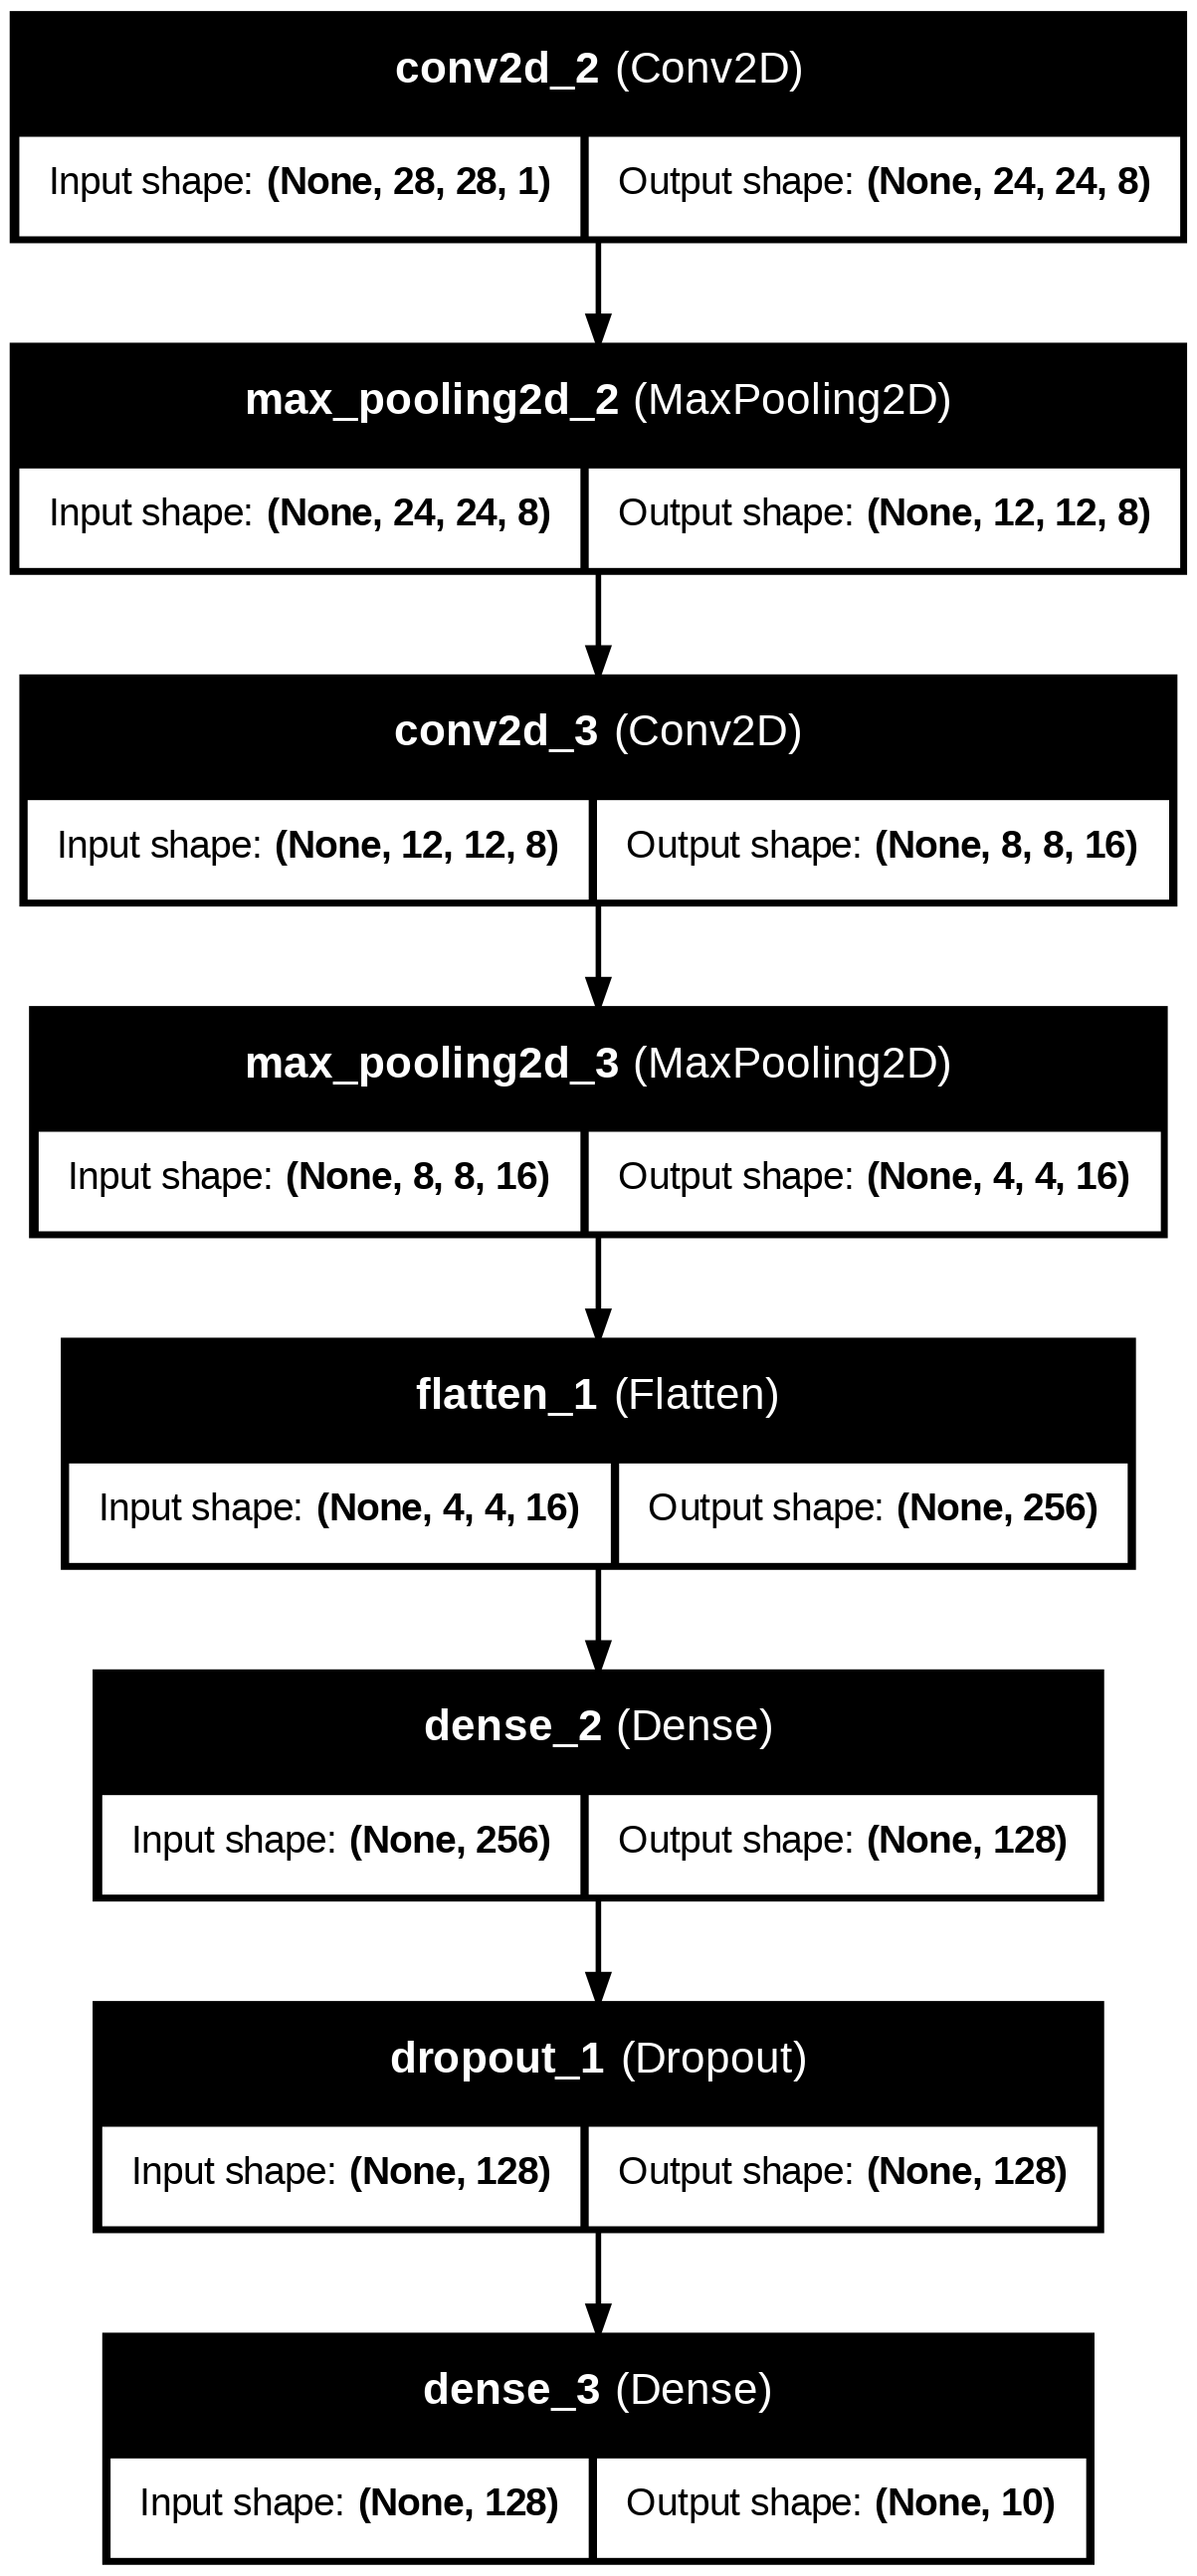

In [43]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

Compile the model using keras.optimizers.Adam

In [44]:
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

Train the model

In [45]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.8387 - loss: 0.5121 - val_accuracy: 0.9795 - val_loss: 0.0691
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.9738 - loss: 0.0851 - val_accuracy: 0.9836 - val_loss: 0.0526
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.9839 - loss: 0.0525 - val_accuracy: 0.9839 - val_loss: 0.0503
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9863 - loss: 0.0448 - val_accuracy: 0.9844 - val_loss: 0.0480
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9884 - loss: 0.0378 - val_accuracy: 0.9873 - val_loss: 0.0416
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.9916 - loss: 0.0289 - val_accuracy: 0.9887 - val_loss: 0.0384
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.9926 - loss: 0.0251 - val_accuracy: 0.9879 - val_loss: 0.0371
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.9930 -

**Model evaluation**

Loss plot curve for training and validation

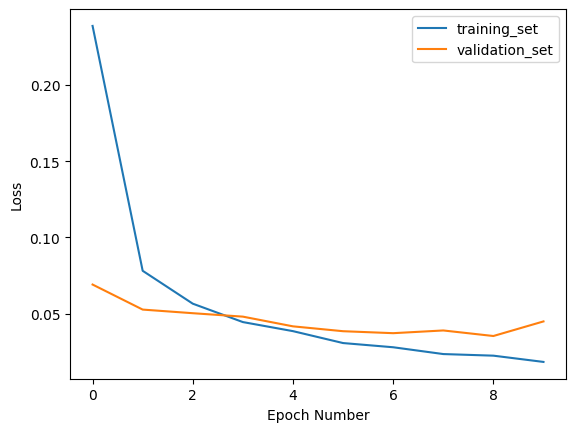

In [46]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training_set')
plt.plot(training_history.history['val_loss'], label='validation_set')
plt.legend()

Accuracy plot curve for training and validation

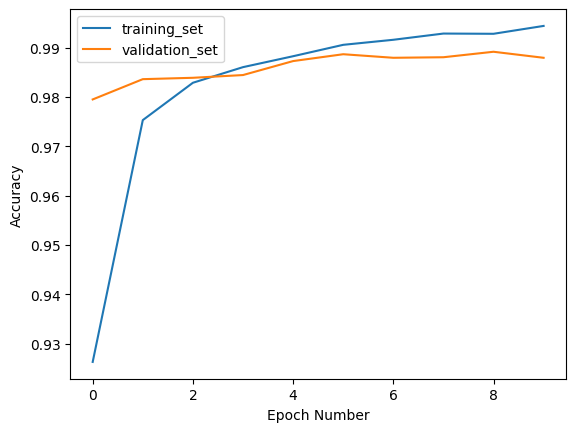

In [47]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training_set')
plt.plot(training_history.history['val_accuracy'], label='validation_set')
plt.legend()

We need to compare the accuracy of our model on training set and on valiation set. We expect our model to perform similarly on both sets. If the performance on validation set is poor compared to training set it would be an indicator for us that the model has overfitted and we have a "high variance" issue.

Performance on training dataset

In [48]:
%%capture
train_loss, train_accuracy = model.evaluate(X_train, y_train)

In [49]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.011962122283875942
Train accuracy:  0.9960952401161194


Performance on validation dataset

In [50]:
%%capture
val_loss, val_accuracy = model.evaluate(X_val, y_val)

In [51]:
print('Validation loss: ', val_loss)
print('Validation accuracy: ', val_accuracy)

Validation loss:  0.04486361891031265
Validation accuracy:  0.9879444241523743


With a validation score of close to 99%, we can proceed to use this model to predict for the test set.

Performance on test dataset

In [52]:
%%capture
test_loss, test_accuracy = model.evaluate(X_test, y_test)

In [53]:
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)

Test loss:  0.03940439969301224
Test accuracy:  0.9886999726295471


Visualise the test predicted data on how the digits were written

In [54]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [55]:
print('predictions:', predictions.shape)

predictions: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from 0 to 9). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [56]:
y_pred = np.argmax(predictions, axis=1)

In [57]:
print(y_pred.shape)

(10000,)


y_test -> True labels                     
y_pred -> Predicted labels

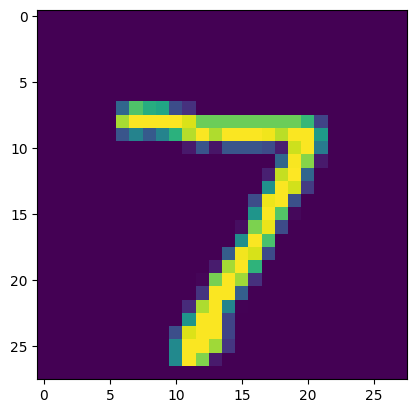

True label: 7
Predicted label 7


In [58]:
plt.imshow(X_test[0].reshape((28, 28, 1)))
plt.show()
print('True label:', y_test[0])
print('Predicted label', y_pred[0])

Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

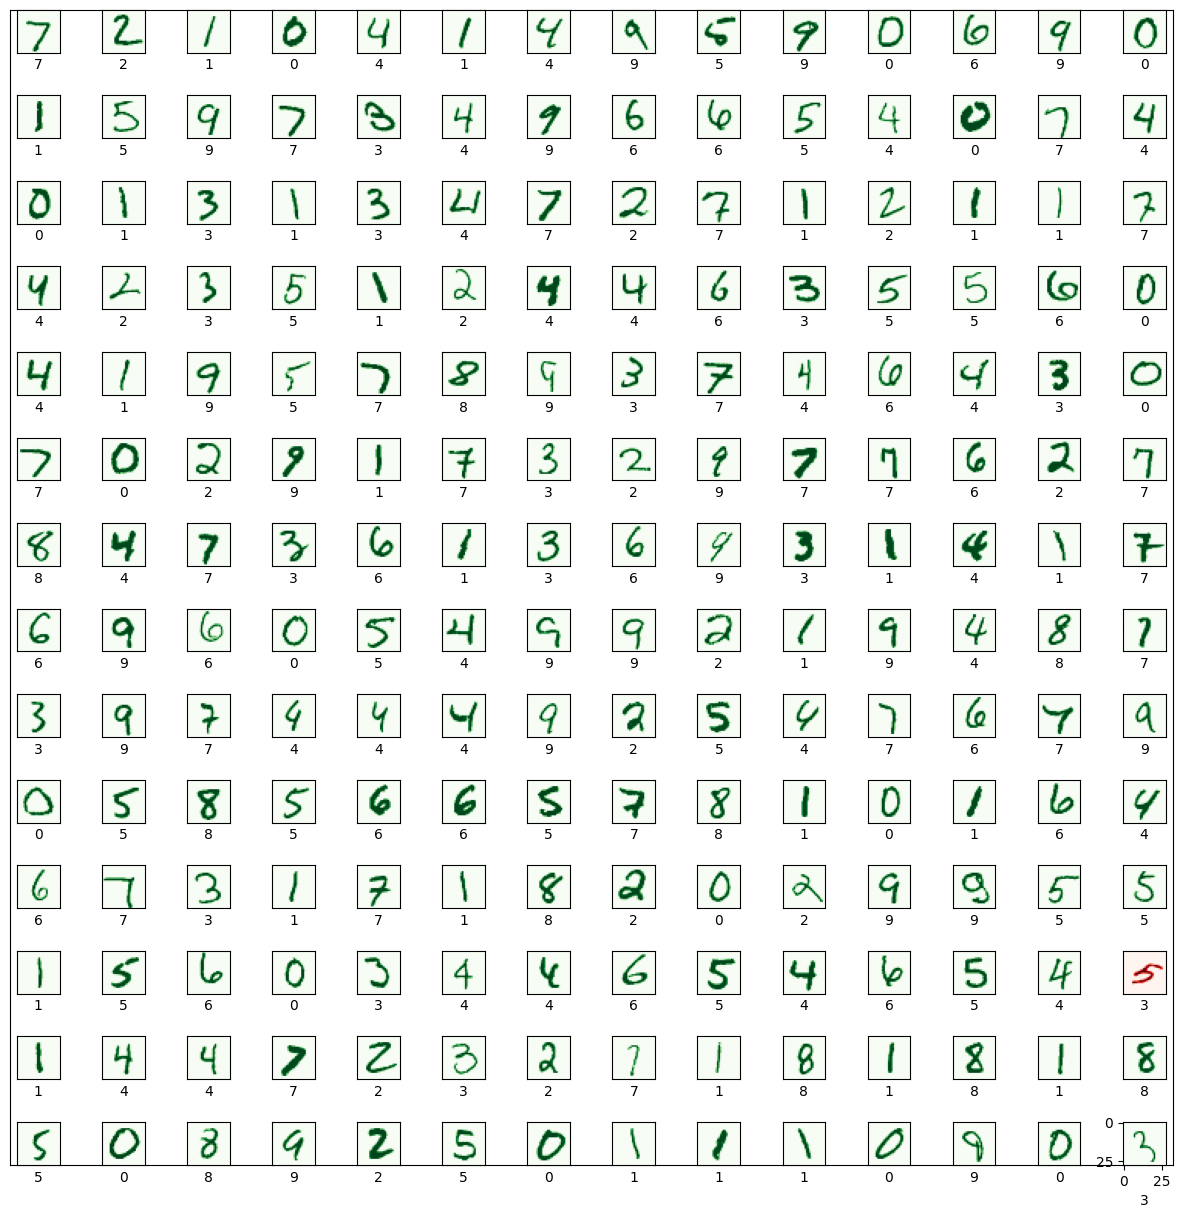

In [59]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = y_pred[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(X_test[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

Confusion matrix of test dataset

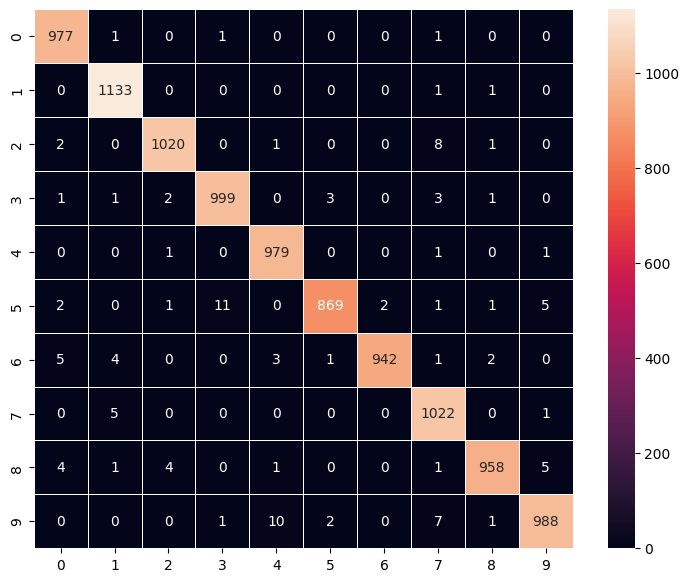

In [60]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Save the model

In [62]:
model.save("digit_model.h5")